In [2]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv("data/verano_23_24.csv", encoding="latin1", sep=";")
df.columns = df.columns.str.capitalize()
df

,Campus,Semana,Taller,Edad_acti,Apenom,Fechanac,Edad,Franja,Dni,Familiar,Email,Tfno_contacto,Cp,Provincia,Poblacion,Observaciones
0,Barcelona Sarria,2-6 septiembre,La factorÕa de juegos,sin edad,"Ros Lodzinski, Diego",27/03/18,"6,3",04-Jun,46791573M,Pablo Ros Fernàndez,pr2369.columbia@gmail.com,636342754,8870,Barcelona,SITGES,NaN
1,Madrid Prosperidad,2-5 septiembre,Techlab Junior: MisiÑn espacial: base lunar,6-9 aÐos,"Maguire Escobar, Denis Adrian",01/09/17,"6,9",04-Jun,X1611034E,Denis Thomas Maguire,denisthomasmaguire@gmail.com,608350178,28007,Madrid,MADRID,NaN
2,Barcelona Sarria,2-6 septiembre,La factorÕa de juegos,sin edad,"Hammond Ariso, Lucas",26/10/16,"7,7",07-Sep,47650262N,Clara Ariso Arnella,claraariso@gmail.com,679495862,8021,Barcelona,BARCELONA,NaN
3,Bilbao Zorrozaurre,2-6 septiembre,Techlab Genius: MisiÑn espacial: base lunar,9-12 aÐos,"Ochandiano Sorando, Xabier",26/09/14,"9,8",07-Sep,05693651R,Pilar Sorando Fernàndez,pilarsorando10@gmail.com,626604774,48005,Bizkaia,BILBAO,NaN
4,Bilbao Zorrozaurre,2-6 septiembre,Techlab Junior: MisiÑn espacial: base lunar,6-9 aÐos,"Ochandiano Sorando, Pablo",04/12/16,"7,6",07-Sep,05693651R,Pilar Sorando Fernàndez,pilarsorando10@gmail.com,626604774,48005,Bizkaia,BILBAO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,LES,30 junio - 7 julio,rea Genius: RobÑtica,9-11 aÐos,"Ojinaga Basterretxea, Elene",18/11/13,"10,6",10-Dec,7884266Q,Zihortza Basterretxea Lejarzegi,zihortza1@gmail.com,690616557,48300,Bizkaia,gernika,"Voy a inscribir a 2 niÐas, primas entre ellas...."
562,LES,30 junio - 7 julio,rea Genius: RobÑtica,9-11 aÐos,"Ojinaga Arana, Irati",18/01/14,"10,5",10-Dec,7884266Q,Zihortza Basterretxea Lejarzegi,zihortza1@gmail.com,690616557,48300,Bizkaia,gernika,Me gustarÕa la pusi_rais con Elene ojinaga en ...
563,LES,30 junio - 7 julio,rea Explorer: Coding,12 o +aÐos,"Rodriguez Perez, Carlos",26/07/12,12,10-Dec,52366639D,Carlos Rodriguez Sanchez,carlos.rsgo@gmail.com,670715452,7819,"Balears, Illes",SAN JOSE,NaN
564,LES,7-14 julio,rea Explorer: Coding,12 o +aÐos,"Bretones Bretones, Marc",14/05/12,"12,2",10-Dec,42324384Z,Elena Boiko Skrypka,csn02626@gmail.com,620053465,8034,Barcelona,BARCELONA,NaN


c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


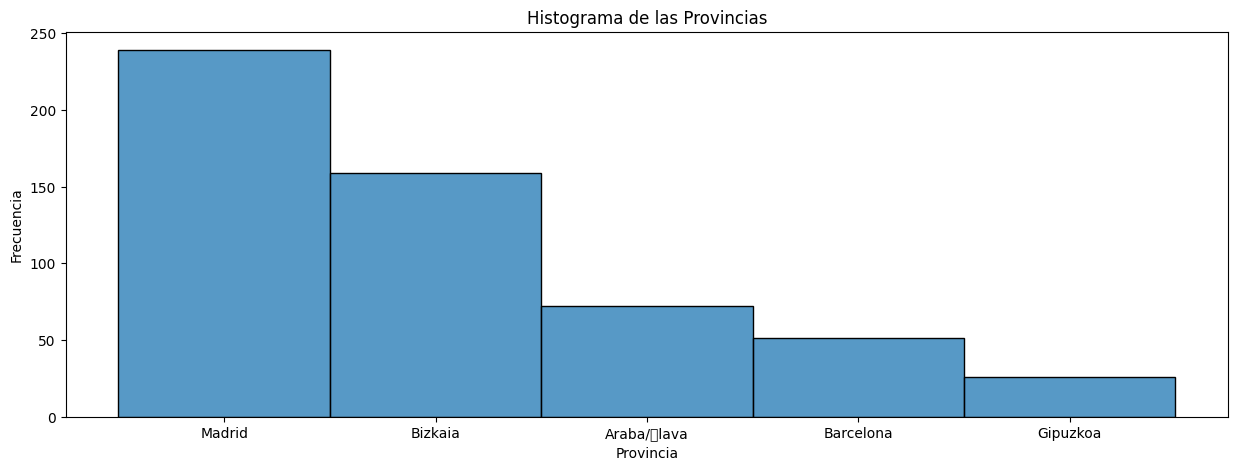

In [5]:
# Contamos cuántas veces se repite cada provincia
provincias_repetidas = df["Provincia"].value_counts()

# Filtramos las provincias que se repiten más de 20 veces
provincias_mas_20 = provincias_repetidas[provincias_repetidas > 20].index

# Creamos una nueva columna que solo contenga las provincias con más de 20 repeticiones
df["Provincia_filtrada"] = df["Provincia"].where(df["Provincia"].isin(provincias_mas_20))

# Convertimos la columna "Provincia_filtrada" en una variable categórica
df["Provincia_filtrada"] = pd.Categorical(df["Provincia_filtrada"], 
                                           categories=provincias_mas_20, 
                                           ordered=True)

# Graficamos el histograma de la nueva columna
plt.figure(figsize=(15, 5))
sns.histplot(df['Provincia_filtrada'].dropna())  # Eliminamos los valores NaN de las provincias no repetidas
plt.title('Histograma de las Provincias')
plt.xlabel('Provincia')
plt.ylabel('Frecuencia')
plt.show()

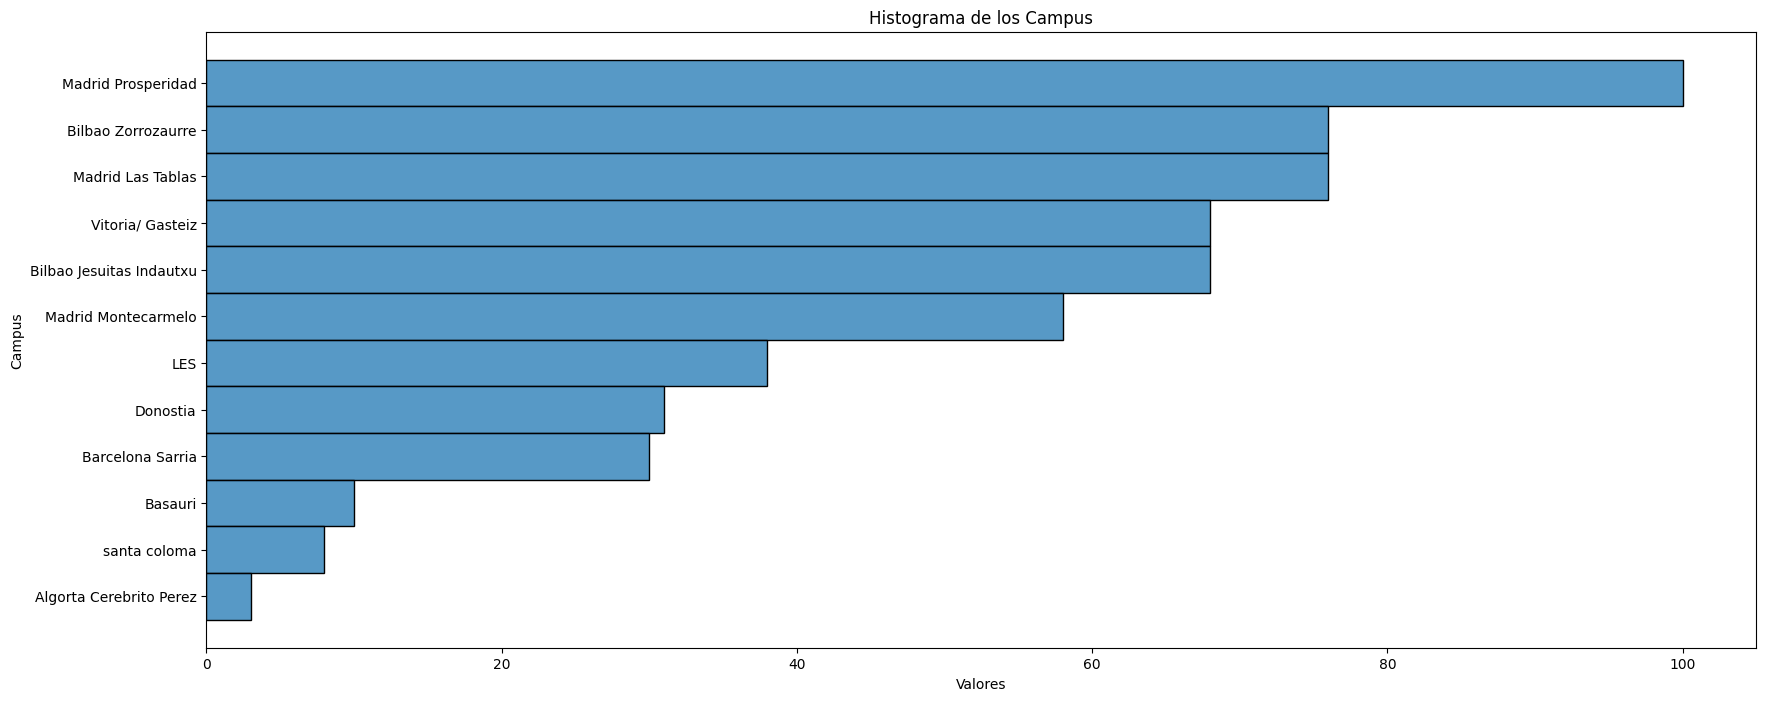

In [6]:
df["Campus"] = pd.Categorical(df["Campus"], 
                                categories=df["Campus"].value_counts().index, 
                                ordered=True)

plt.figure(figsize=(20, 8))
sns.histplot(y=df['Campus'])
plt.title('Histograma de los Campus')
plt.xlabel('Valores')
plt.ylabel('Campus')
plt.show()

c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


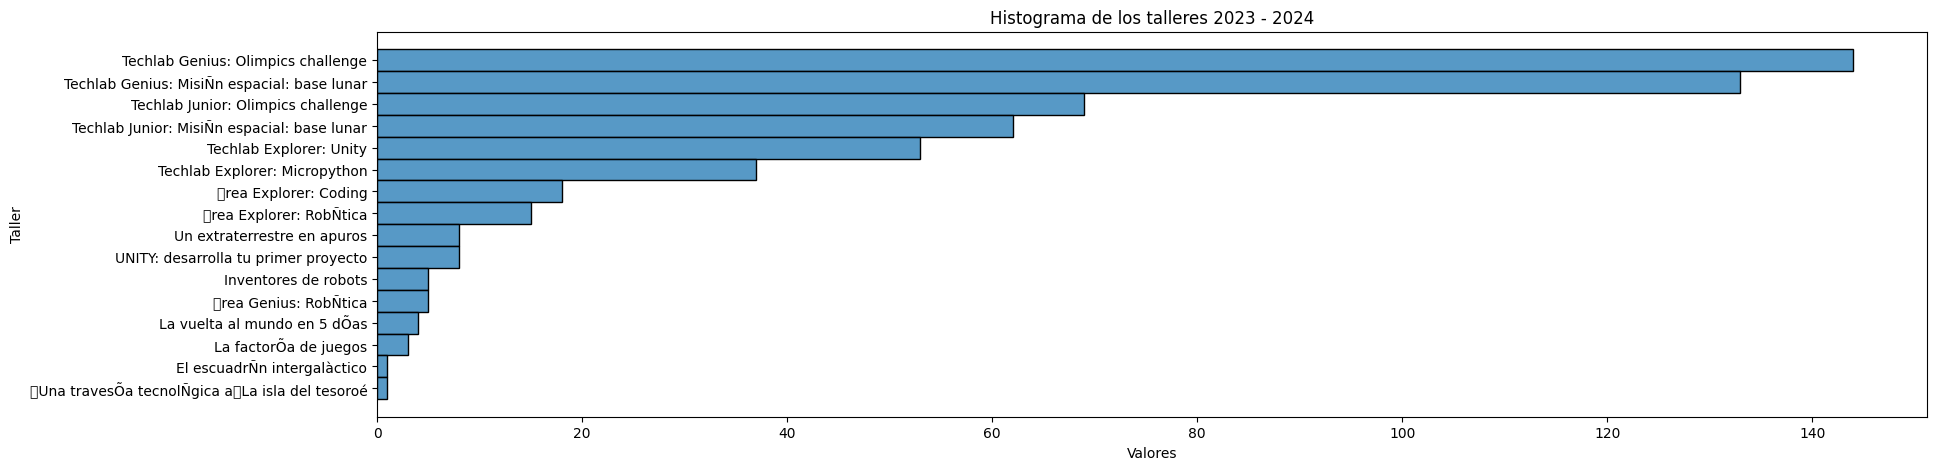

In [7]:
df["Taller"] = pd.Categorical(df["Taller"], 
                                categories=df["Taller"].value_counts().index, 
                                ordered=True)

plt.figure(figsize=(20, 5))
sns.histplot(y=df["Taller"])
plt.title('Histograma de los talleres 2023 - 2024')
plt.xlabel('Valores')
plt.ylabel('Taller')
plt.show()

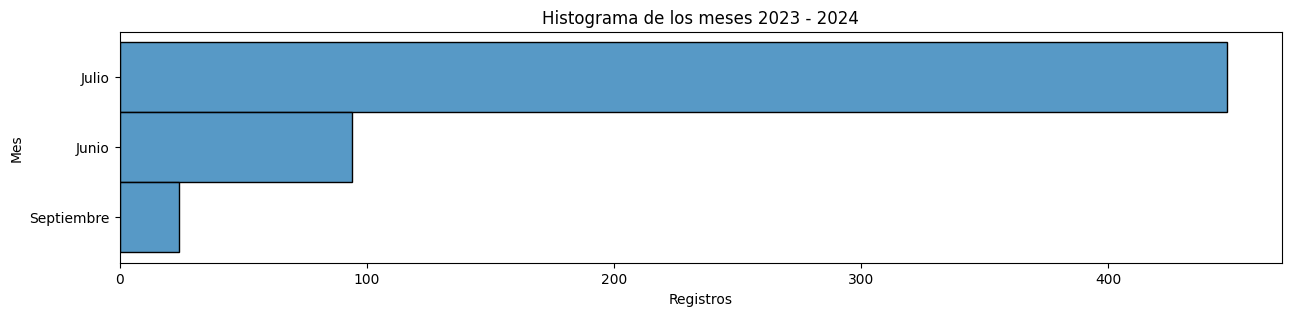

In [8]:
df["Mes"] = df["Semana"].str.split(" ").str[1]
df["Mes"] = df["Mes"].str.capitalize()

df["Mes"] = pd.Categorical(df["Mes"], 
                            categories=df["Mes"].value_counts().index, 
                            ordered=True)

plt.figure(figsize=(15, 3))
sns.histplot(y=df["Mes"])
plt.title('Histograma de los meses 2023 - 2024')
plt.xlabel('Registros')
plt.ylabel('Mes')
plt.show()

C:\Users\gontz\AppData\Local\Temp\ipykernel_20140\1387062036.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  talleres_por_edad = df.groupby(['Taller', 'Edad']).size().reset_index(name='Count')
C:\Users\gontz\AppData\Local\Temp\ipykernel_20140\1387062036.py:10: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gontz\AppData\Local\Temp\ipykernel_20140\1387062036.py:10: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\gontz\AppData\Local\Temp\ipykernel_20140\1387062036.py:10: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaV

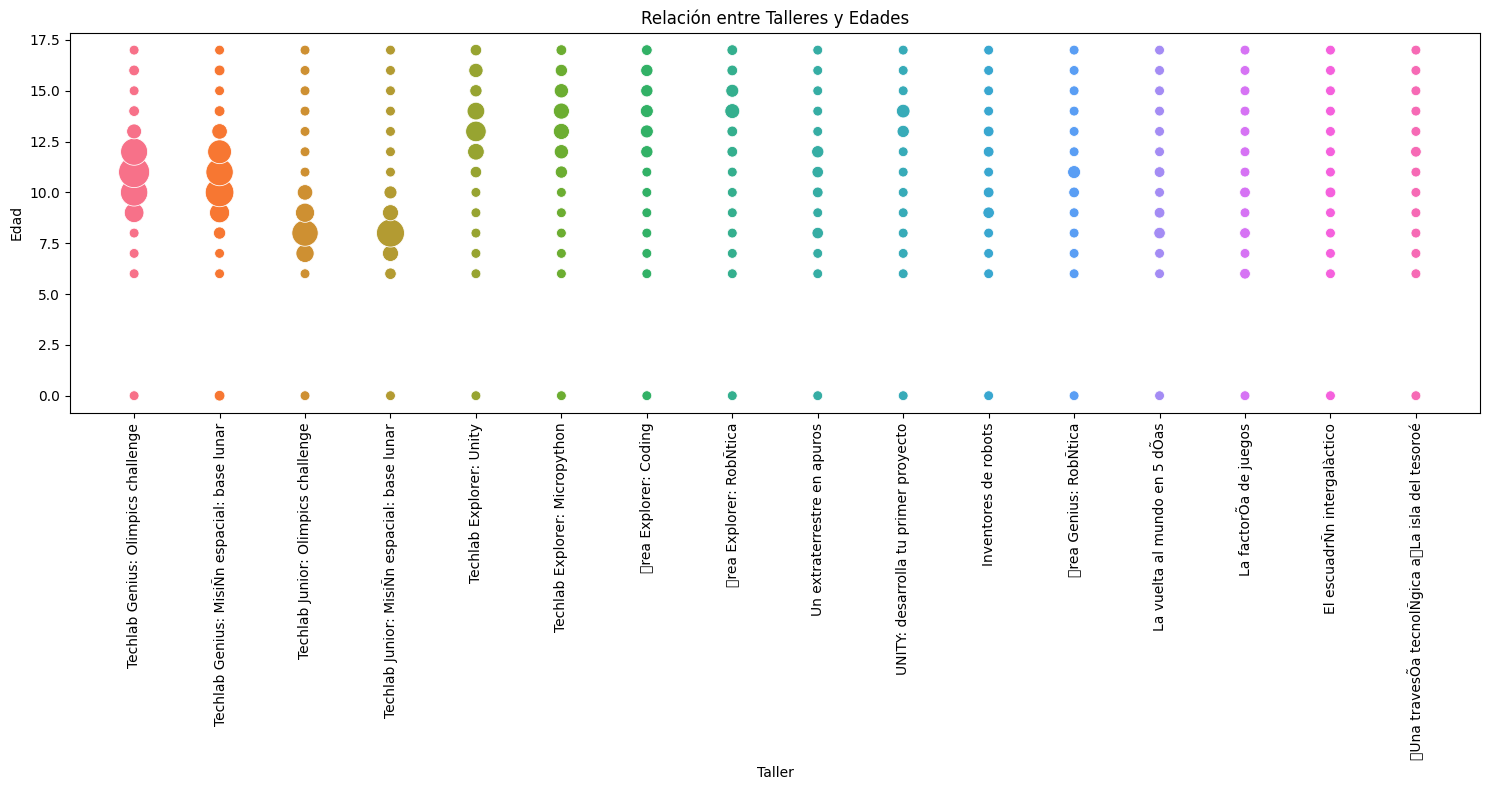

In [9]:
df["Edad"] = df["Edad"].str.replace(",", ".").replace("-", 0).astype(float).round().astype(int)
talleres_por_edad = df.groupby(['Taller', 'Edad']).size().reset_index(name='Count')

plt.figure(figsize=(15, 8))
sns.scatterplot(data=talleres_por_edad, x='Taller', y='Edad', size='Count', hue='Taller', sizes=(50, 500), legend=False)
plt.title('Relación entre Talleres y Edades')
plt.xlabel('Taller')
plt.ylabel('Edad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\gontz\AppData\Local\Temp\ipykernel_20140\3063834357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  talleres_por_edad = df.groupby(['Taller', 'Edad']).size().unstack(fill_value=0)
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:17

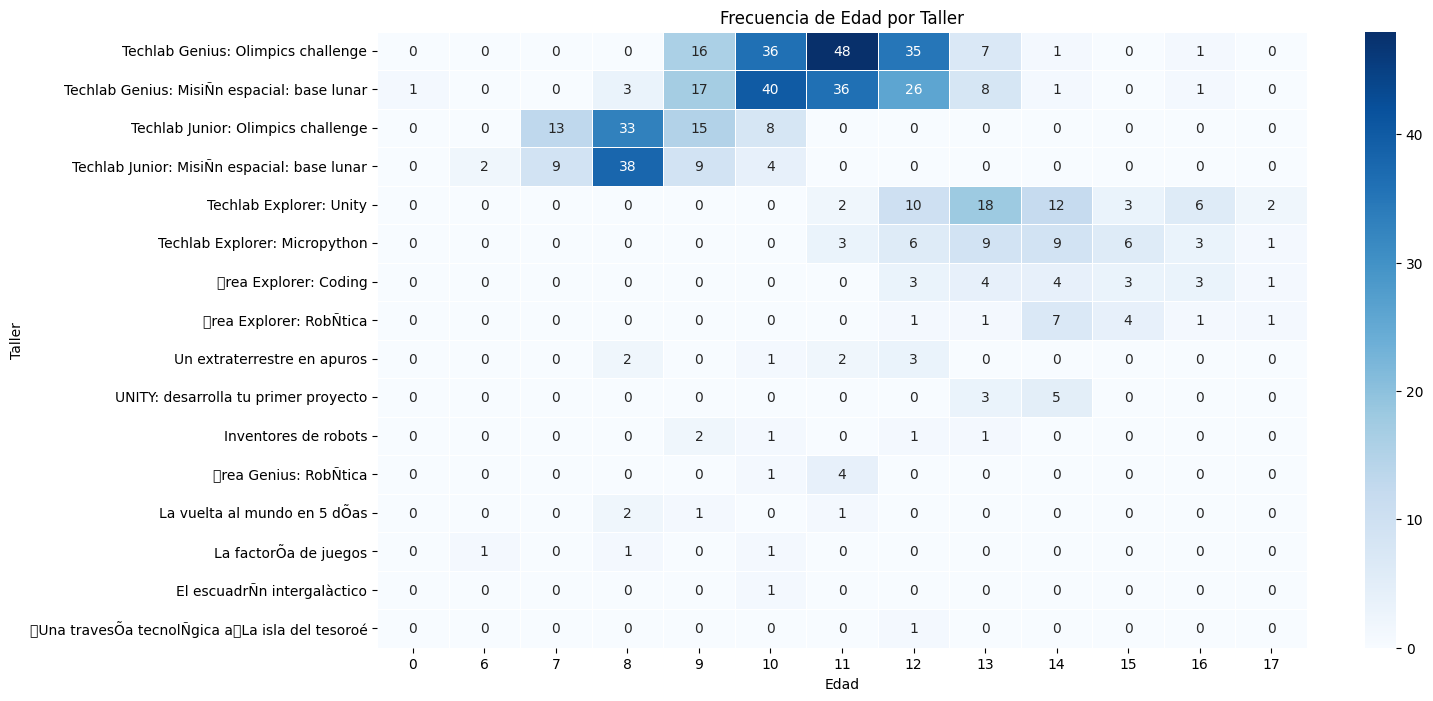

In [10]:
talleres_por_edad = df.groupby(['Taller', 'Edad']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
sns.heatmap(talleres_por_edad, cmap="Blues", linewidths=0.5, annot=True, fmt="d")

plt.title('Frecuencia de Edad por Taller')
plt.xlabel('Edad')
plt.ylabel('Taller')
plt.show()

C:\Users\gontz\AppData\Local\Temp\ipykernel_20140\3403100726.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emails_multiples.values, y=emails_multiples.index, palette="viridis")


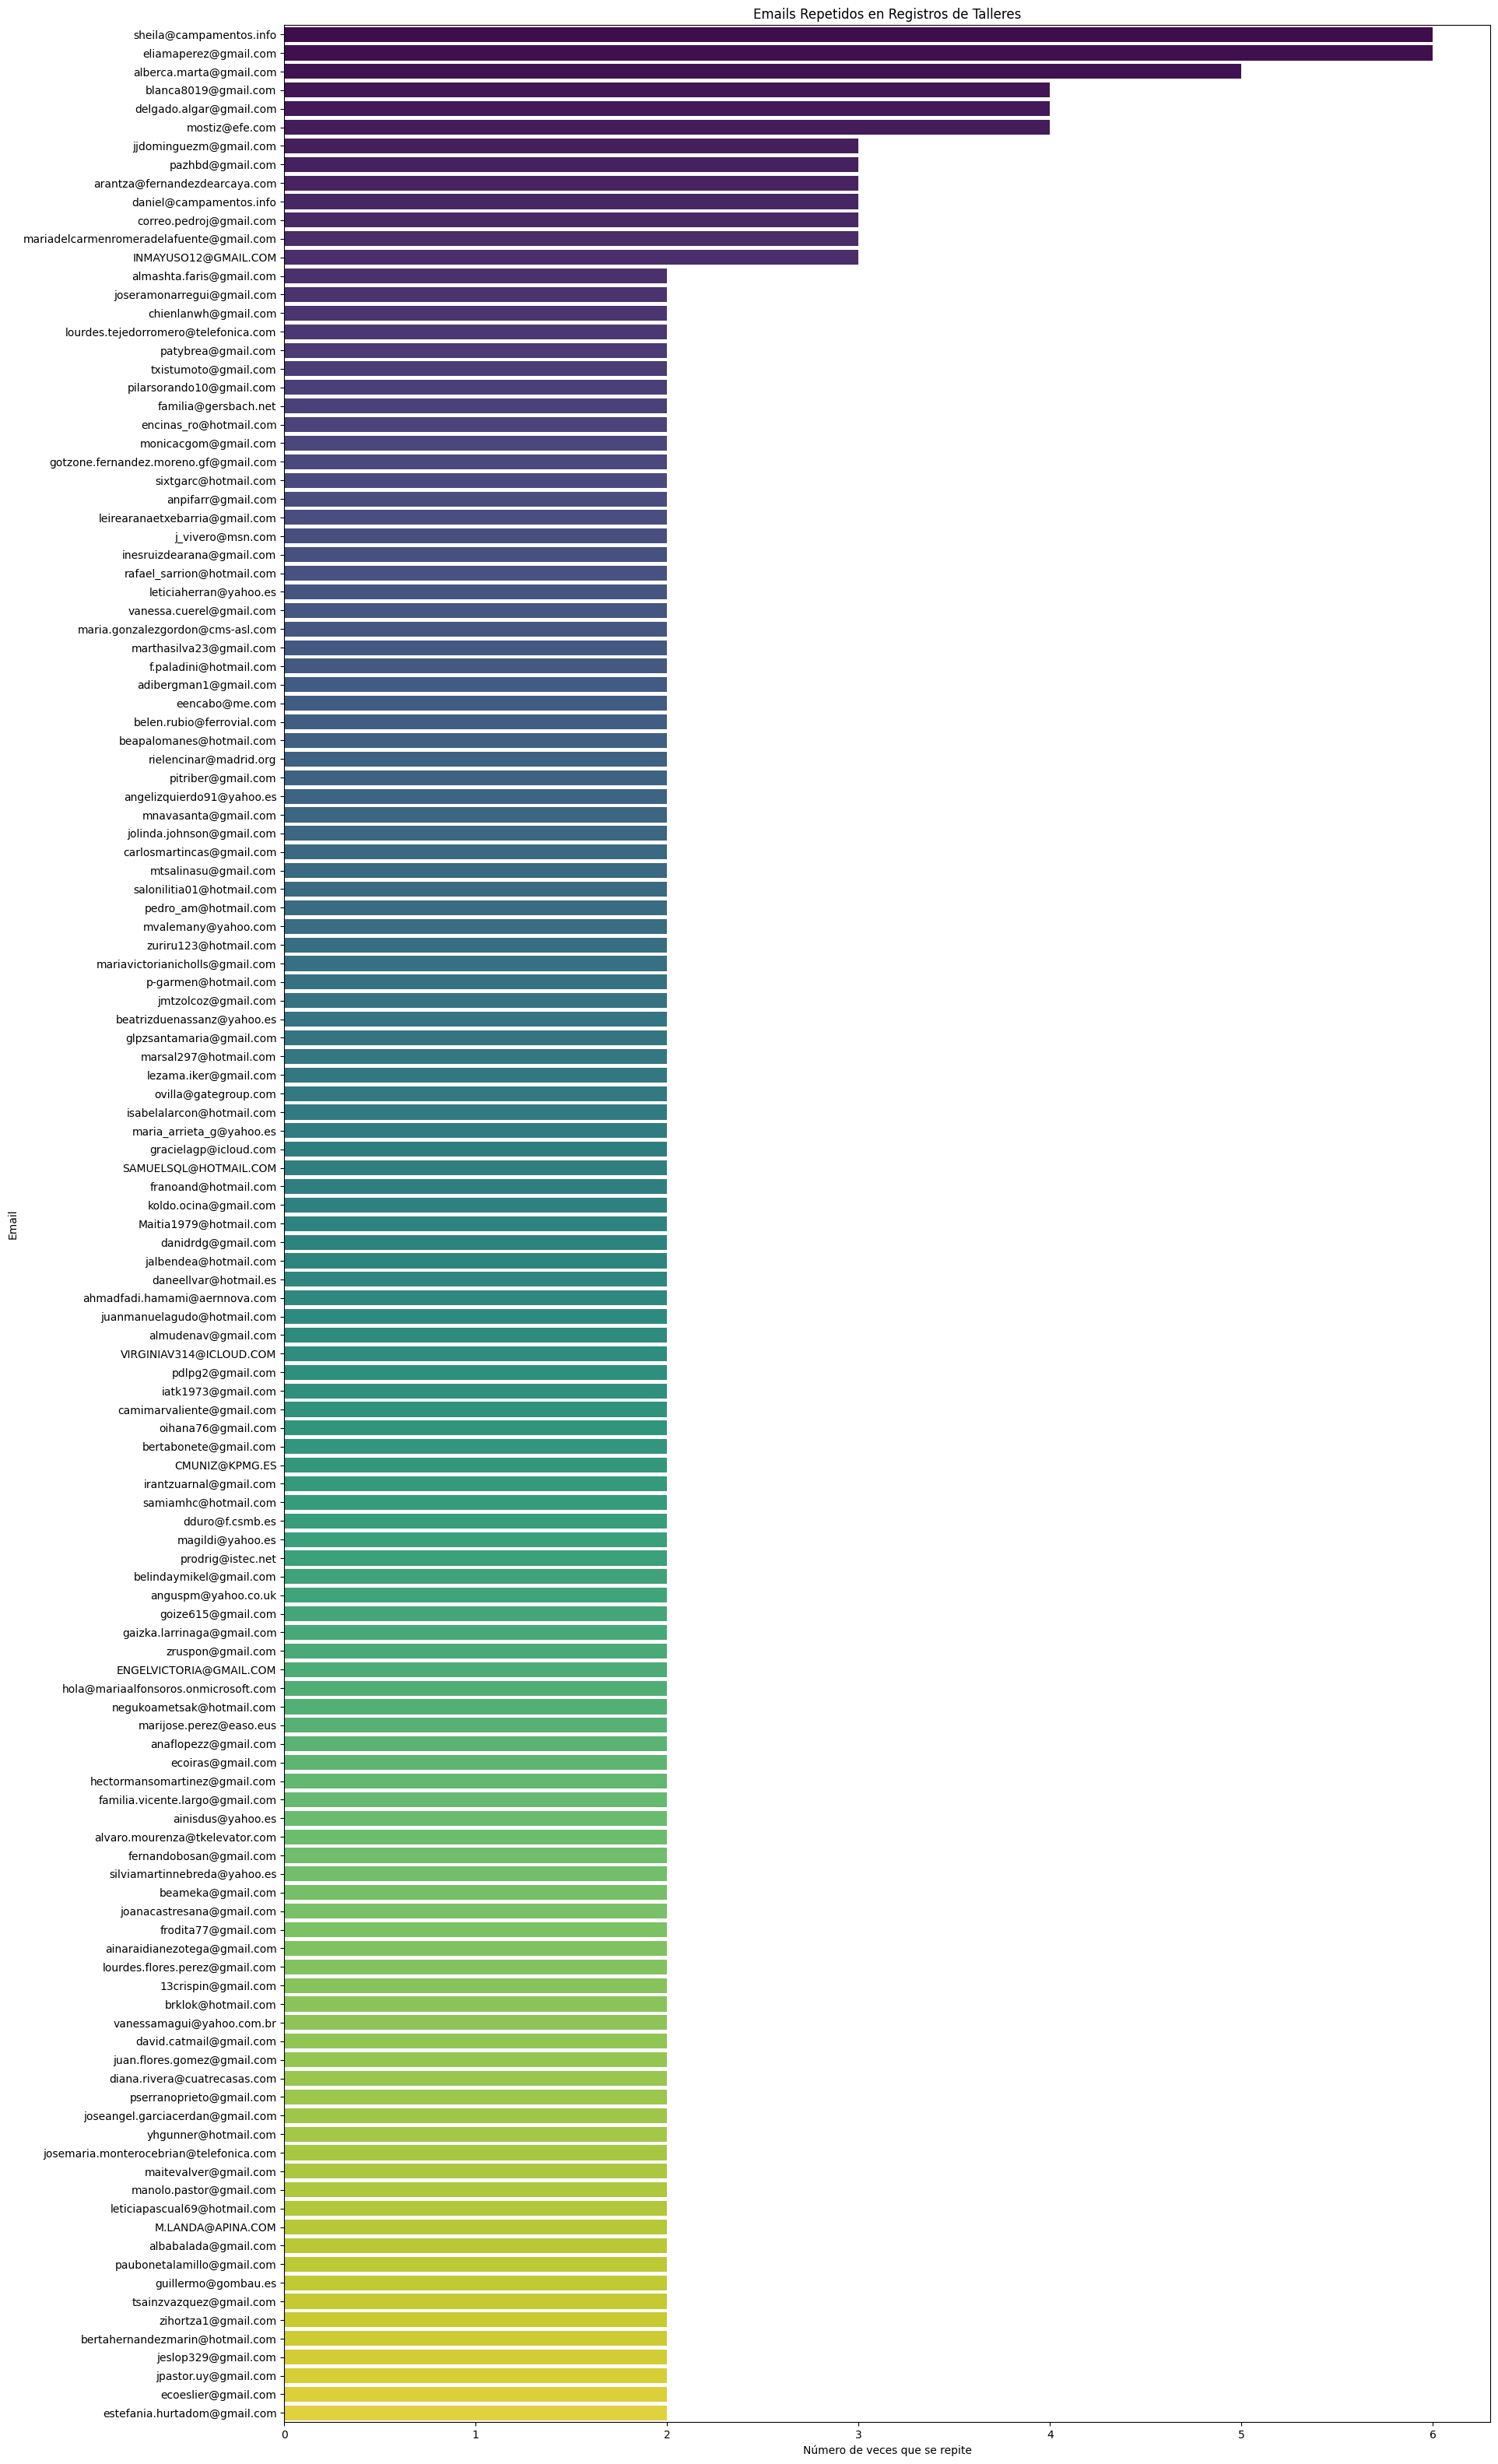

In [11]:
emails_repetidos = df[df.duplicated(subset=["Email"], keep=False)]
conteo_emails = df["Email"].value_counts()
emails_multiples = conteo_emails[conteo_emails > 1]
df_duplicados = df[df["Email"].isin(emails_multiples.index)]

if os.path.exists("out/emails_repetidos.csv"):
    os.remove("out/emails_repetidos.csv")

for email in emails_multiples.index:
    open("out/emails_repetidos.txt", "a").write(email + "\n")

plt.figure(figsize=(20, 40))
sns.barplot(x=emails_multiples.values, y=emails_multiples.index, palette="viridis")
plt.xlabel("Número de veces que se repite")
plt.ylabel("Email")
plt.title("Emails Repetidos en Registros de Talleres")
plt.show()

C:\Users\gontz\AppData\Local\Temp\ipykernel_20140\3353620059.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=talleres_contados.values, y=talleres_contados.index, palette="viridis")
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\gontz\Documents\Practicas_2025\entorno_py\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


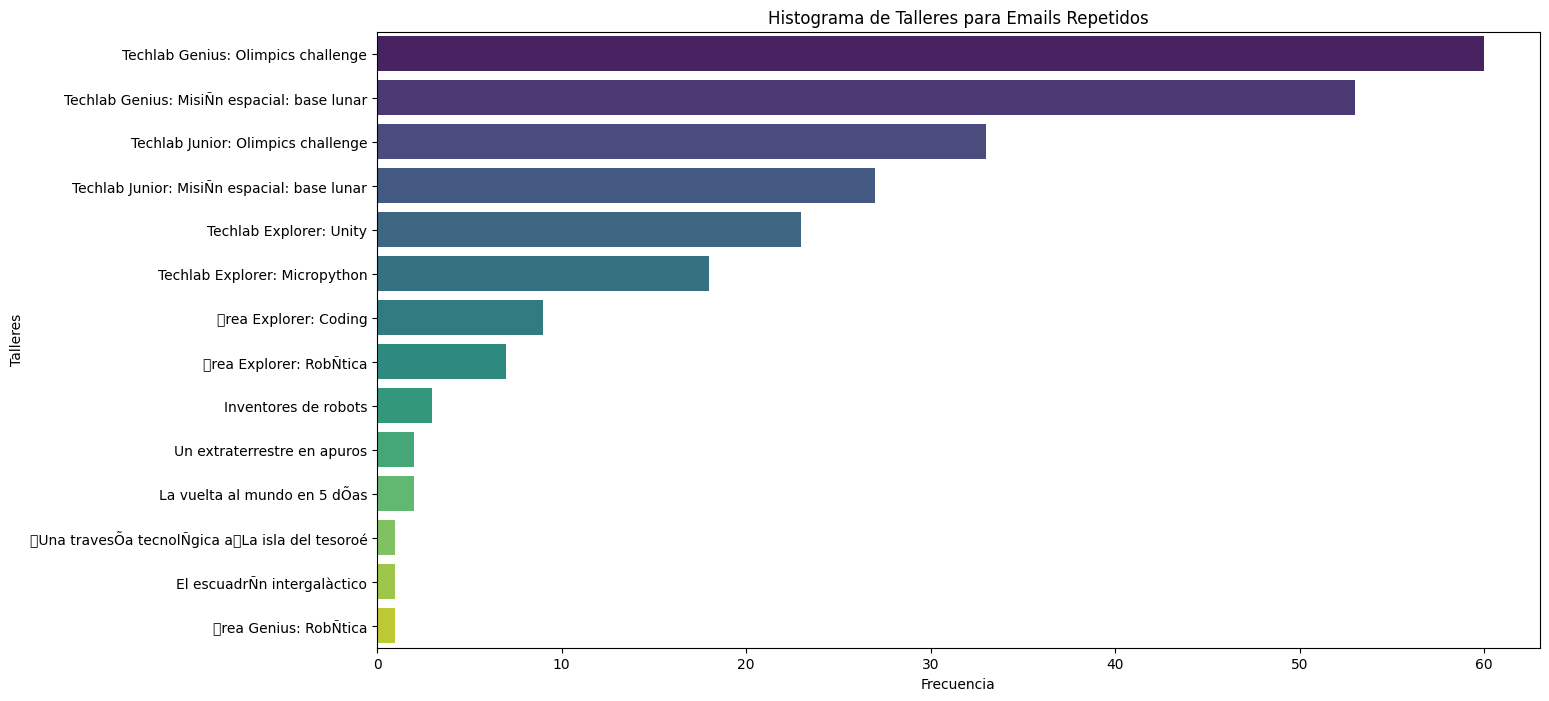

In [12]:
# Filtrar los registros duplicados por correo
emails_repetidos = df[df.duplicated(subset=["Email"], keep=False)]

# Contar las repeticiones de los emails
conteo_emails = df["Email"].value_counts()

# Filtrar los emails con múltiples apariciones
emails_multiples = conteo_emails[conteo_emails > 1]

# Filtrar los registros duplicados
df_duplicados = df[df["Email"].isin(emails_multiples.index)]

# Crear una nueva columna que contenga los talleres asociados con los emails repetidos
talleres_por_email = df_duplicados.groupby("Email")["Taller"].unique().reset_index()

# Crear una lista de todos los talleres en los que han participado los emails repetidos
talleres_lista = []
for talleres in talleres_por_email["Taller"]:
    talleres_lista.extend(talleres)

# Contar la frecuencia de cada taller
talleres_contados = pd.Series(talleres_lista).value_counts()

# Graficar el histograma de los talleres de los emails repetidos en orden de mayor a menor
plt.figure(figsize=(15, 8))
sns.barplot(x=talleres_contados.values, y=talleres_contados.index, palette="viridis")
plt.title('Histograma de Talleres para Emails Repetidos')
plt.xlabel('Frecuencia')
plt.ylabel('Talleres')
plt.show()

# Borrar el archivo si ya existe
if os.path.exists("out/emails_repetidos_taller.csv"):
    os.remove("out/emails_repetidos_taller.csv")

# Guardar en un archivo CSV los emails y los talleres asociados
with open("out/emails_repetidos_taller.csv", "w", encoding="utf-8") as file:
    file.write("Email;Talleres\n")

# Escribir los emails y sus talleres en el archivo CSV
for email in emails_multiples.index:
    with open("out/emails_repetidos_taller.csv", "a", encoding="utf-8") as file:
        talleres = "/".join(df_duplicados[df_duplicados["Email"] == email]["Taller"].unique())
        file.write(f"{email};{talleres}\n")
